------------

# Комментарии

Привет, Павел!

Я проверила твою работу и оставила в ней комментарии. Комментарии оформлены в таких ячейках и вставлены сразу после ячейки или группы ячеек, к которым относятся. А в самом низу общие комментарии по работе. Надеюсь, тебе все будет понятно :)

Хорошая работа :)

------------

### 0.Описание проекта

Извлечение информации из баз данных (аэропорты, модели самолетов, билеты, авиарейсы, фестивали) и анализ спроса пассажиров на рейсы в города, где проходят крупнейшие фестивали. 

### 1. Предобработка данных
Для двух наборов данных нужно:
- импортировать файлы;
- изучить данные в них;
- проверить типы данных на корректность.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

pd.set_option('display.max_rows', 11)

In [2]:
models = pd.read_csv('/datasets/query_1.csv')

В models содержится следующая информация:
- model — модель самолета;
- flights_amount — количество рейсов для каждой модели самолетов model в сентябре 2018 года.
    

In [3]:
models

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


In [4]:
# выведем типы данных и количество записей в датасете
models.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 208.0+ bytes


In [5]:
avg_arrival_flights = pd.read_csv('/datasets/query_3.csv')

В avg_arrival_flights содержится следующая информация:
- city — город;
- average_flights — среднее количество рейсов, прибывающих в город city за день в сентябре 2018 года;

In [6]:
avg_arrival_flights

,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
...,...,...
96,Чита,1.580645
97,Элиста,4.870968
98,Южно-Сахалинск,4.290323
99,Якутск,2.741935


In [7]:
# выведем типы данных и количество записей в датасете
avg_arrival_flights.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


Данные собраны корректно, без пропусков и неправильных типов.

------------

# Комментарии

Отлично :)

А есть ли в данных дубликаты?

------------

## 2. Исследовательский анализ данных   
Для двух наборов данных нужно:
- выбрать топ-10 городов по количеству рейсов;
- построить графики:  
    - модели самолетов и количество рейсов;
    - города и количество рейсов;
    - топ-10 городов и количество рейсов.

In [8]:
# топ-10 городов по количеству рейсов в день
avg_arrival_flights.sort_values('average_flights', ascending = False).head(10)

,city,average_flights
43,Москва,129.774194
70,Санкт-Петербург,31.161290
54,Новосибирск,17.322581
33,Красноярск,11.580645
20,Екатеринбург,11.322581
67,Ростов-на-Дону,10.193548
63,Пермь,10.129032
10,Брянск,10.000000
74,Сочи,9.612903
84,Ульяновск,9.580645


In [9]:
# функция для отображения значений на графиках 
def _show_values_on_bars(ax, h_v = "v", space = 0.4, decimal = 0):
    if h_v == "v":
        for p in ax.patches:
            _x = p.get_x() + p.get_width() / 2
            _y = p.get_y() + p.get_height() + float(space)
            if decimal == 0:
                value = int(p.get_height())
            else:
                value = round(p.get_height(), decimal)
            ax.text(_x, _y, value, ha = "center")
    elif h_v == "h":
        for p in ax.patches:
            _x = p.get_x() + p.get_width() + float(space)
            _y = p.get_y() + p.get_height()
            if decimal == 0:
                value = int(p.get_width())
            else:
                value = round(p.get_width(), decimal)
            ax.text(_x, _y, value, ha="left")

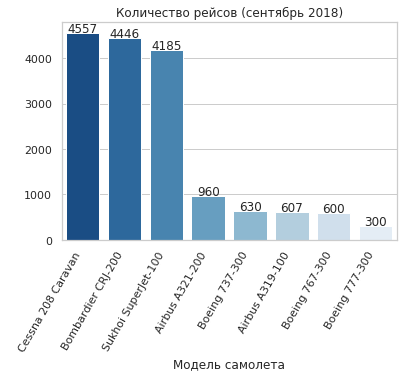

In [10]:
# количество рейсов для выбранных моделей самолетов 
sns.set(style = "whitegrid")

ax = sns.barplot(x = "model", y = "flights_amount",
                 data = models.sort_values('flights_amount', ascending = False), palette = "Blues_r")

plt.xticks(rotation = 60, horizontalalignment = 'right')

ax.set(xlabel = 'Модель самолета', ylabel = ' ', title = 'Количество рейсов (сентябрь 2018)')

_show_values_on_bars(ax, 'v', 20)

plt.show()

В сентябре 2018 года больше всего авиарейсов было совершено на моделях самолетов:
- Cessna 208 Caravan;
- Bombardier CRJ-200;
- Sukhoi SuperJet-100,

на всех остальных моделях было совершено намного меньше (как минимум в 4 раза) рейсов. 

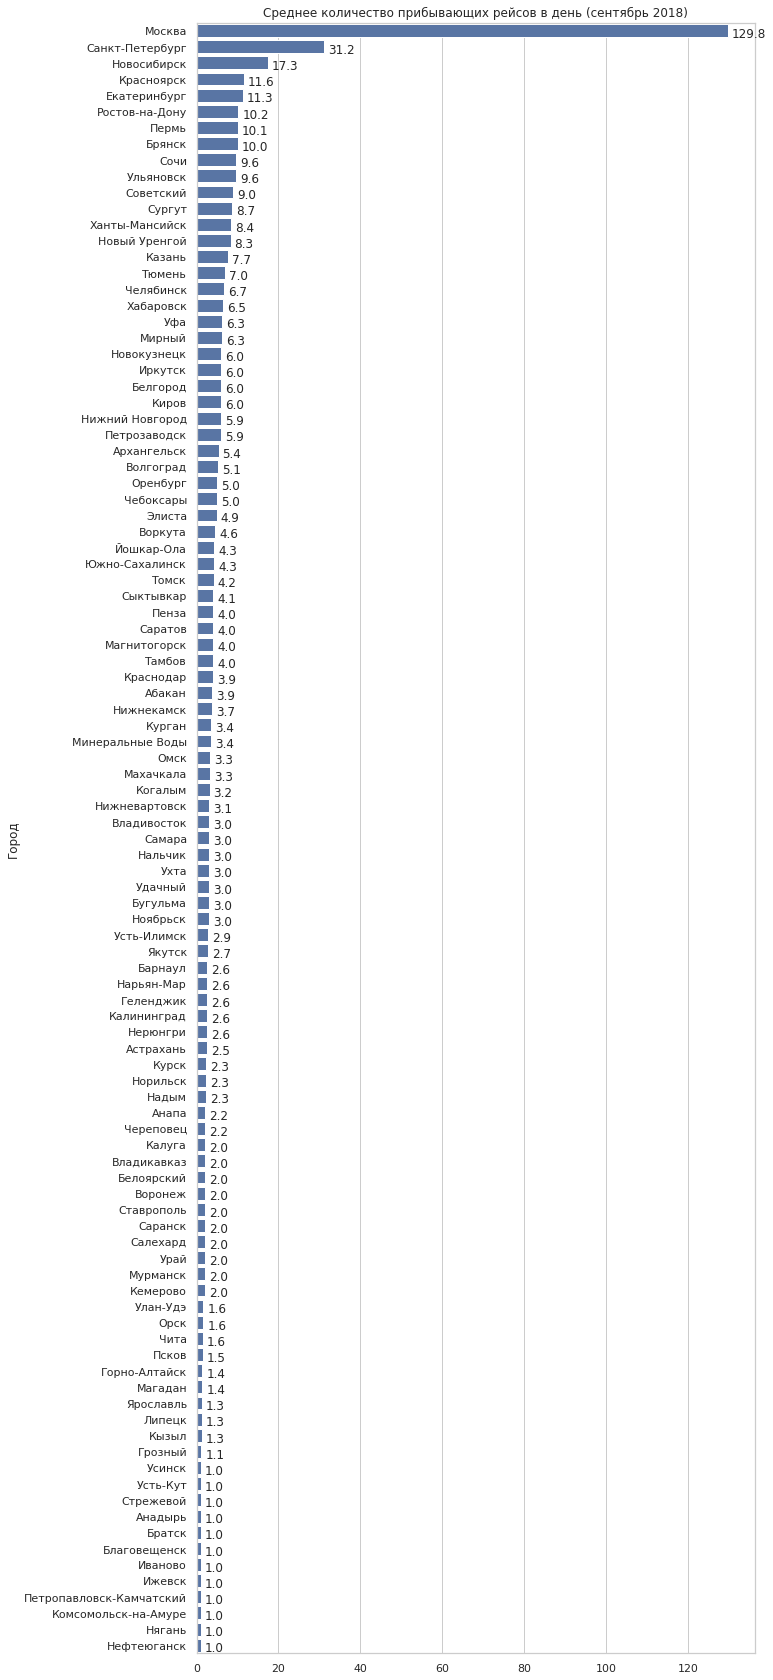

In [11]:
# среднее количество прибывающих рейсов в день для выбранных городов
f, ax = plt.subplots(figsize=(10, 30))

sns.barplot(y = "city", x = "average_flights", data=avg_arrival_flights.sort_values('average_flights', ascending = False),
            color = "b")

ax.set(xlabel = '', ylabel = 'Город', title = 'Среднее количество прибывающих рейсов в день (сентябрь 2018)')

_show_values_on_bars(ax, 'h', 1, 1)

plt.show()

В сентябре 2018 года только в 8 городах из всего списка выбранных (101) в среднем прибывает по 10 и больше рейсов в день. Причем в Москву прибывает столько же рейсов, сколько во все остальные города топ-11 (по количеству рейсов) вместе взятые.

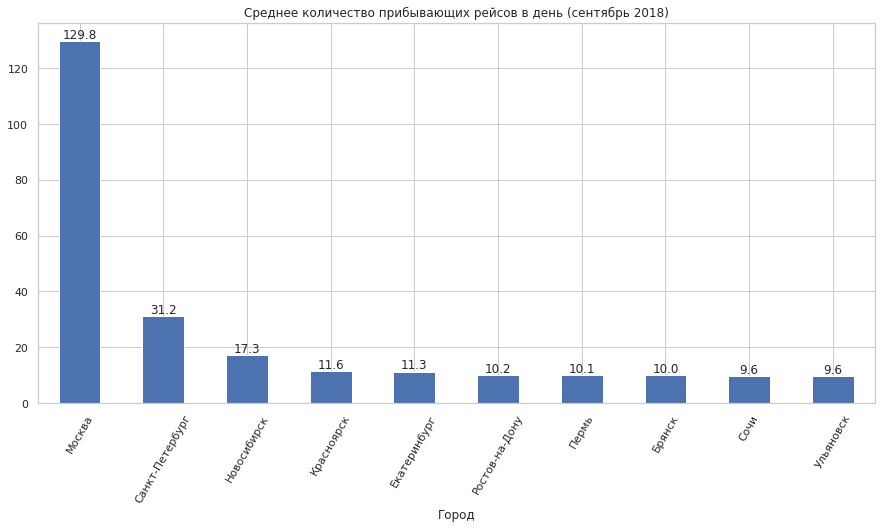

In [12]:
# топ-10 городов по среднему количеству прибывающих рейсов в день  
ax = avg_arrival_flights.sort_values('average_flights', ascending = False).head(10)\
.plot(x = 'city', kind = 'bar', legend = False, grid = True, figsize = (15,7))

_show_values_on_bars(ax, 'v', 1, 1)  

ax.set(xlabel = 'Город', ylabel = '', title = 'Среднее количество прибывающих рейсов в день (сентябрь 2018)')    
plt.xticks(rotation = 60)
plt.show()

------------

# Комментарии

Классные графики :)

Как можешь объяснить полученные результаты?

------------

## 3. Проверка гипотезы
Проверьте гипотезу: «Средний спрос на билеты во время фестивалей не отличается от среднего спроса на билеты в обычное время».

In [13]:
# рассмотрим датасет с информацией о количестве проданных билетов на авиарейсы
tickets = pd.read_csv('/datasets/query_last.csv')

В tickets содержится следующая информация:
- week_number — номер недели;
- ticket_amount — количество проданных билетов за неделю;
- festival_week — есть ли на этой неделе фестиваль (номер недели - если есть; NaN - если нет);
- festival_name — название фестиваля.

In [14]:
tickets

,week_number,ticket_amount,festival_week,festival_name
0,30,43568,30.0,Park Live
1,31,51034,31.0,Пикник Афиши
2,32,51675,NaN,NaN
3,33,51378,NaN,NaN
4,34,51492,NaN,NaN
5,35,51360,NaN,NaN
6,36,51386,36.0,Видфест
7,37,51670,NaN,NaN
8,38,51518,NaN,NaN
9,39,51623,NaN,NaN


------------

# Комментарии

Хорошо :)

Есть ли какие-то проблемы в этих данных: пропуски, несоответствие типов, дубликаты?

------------

Рассмотрим два набора данных: количество проданных билетов за неделю для тех недель, когда были фестивали, и когда их не было. 

In [15]:
# количество проданных билетов в недели без фестивалей
tickets[tickets['festival_week'].isna()].ticket_amount.describe()

count        7.000000
mean     51530.857143
std        130.933098
min      51360.000000
25%      51435.000000
50%      51518.000000
75%      51646.500000
max      51675.000000
Name: ticket_amount, dtype: float64

In [16]:
# количество проданных билетов в недели с фестивалями
tickets[~tickets['festival_week'].isna()].ticket_amount.describe()

count        3.000000
mean     48662.666667
std       4415.619700
min      43568.000000
25%      47301.000000
50%      51034.000000
75%      51210.000000
max      51386.000000
Name: ticket_amount, dtype: float64

------------

# Комментарии

Какие выводы можешь сделать на основе полученной информации?

------------

Сформулируем нулевую гипотезу: среднее количество проданных билетов в Москву в те недели, когда там проходили фестивали равно среднему количеству проданных билетов в остальное время (в пределах ограничения по дате: 23 июля - 30 сентября 2018).

------------

# Комментарии

Отлично :)

Как формулируется альтернативная гипотеза?

------------

In [17]:
# зададим уровень статистической значимости в 5%
alpha = .05 

# поскольку дисперсии (и стандартные отклонения) для двух наборов не равны,
# изменим значение параметре equal_var, установленное по умолчанию
results = st.ttest_ind(
    tickets[tickets['festival_week'].isna()].ticket_amount, 
    tickets[~tickets['festival_week'].isna()].ticket_amount, equal_var = False)

print('p-значение:', results.pvalue)

p-значение: 0.377432493172683


Уровень статистической значимости выше критического, нулевая гипотеза подтверждается.

С вероятностью ~38% среднее количество проданных билетов в недели без фестивалей равно среднему количеству билетов проданных в остальное время.

---

# Комментарии

Хорошо :)

На основе чего делаешь вывод о том, что дисперсии двух выборок не равны?

Правильней писать, что нулевая гипотеза не отвергается. Ты не знаешь наверняка верна ли эта гипотеза, но для этих данных она верна, поэтому нулевая гипотеза имеет место быть и она не отвергается:)

Как можешно объяснить полученный результат?

---

------------

# Комментарии

Отлично, ты справился с проектом :)

Хорошая работы и классные графики :) Поработай над объяснением полученных результатов :)

***Успехов в следующем спринте !!!***

------------